# Visualización con *salary.csv*

El dataset *salary.csv* contiene salarios de profesores universitarios de una universidad de Estados Unidos. Nos han solicitado analizar gráficamente el dataset y detectar discrepancias de ingresos entre grupos distintos.

### Importamos los paquetes requeridos 

In [1]:
# Paquetes numéricos y estadísticos
import numpy as np
import scipy.stats as stats

# Pandas maneja la carga y manipulación del dataset
import pandas as pd

# Funciones de plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar matplotlib para que se muestre en la notebook
%matplotlib inline

### Cargamos los datos

In [2]:
# leemos el dataset con pandas (ver práctica guiada)
salary = pd.read_csv('salary.csv')

In [3]:
# chequeamos las primeras líneas del dataset
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


* ¿El nombre de las columnas es suficientemente claro? 

In [4]:
salary.columns

Index(['sx', 'rk', 'yr', 'dg', 'yd', 'sl'], dtype='object')

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
sx    52 non-null object
rk    52 non-null object
yr    52 non-null int64
dg    52 non-null object
yd    52 non-null int64
sl    52 non-null int64
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


Como conocemos al información de antemano, podemos renombar las columnas para evitar malos entendidos a posteriori. El código para esto es:

```salary.columns = ['gender', 'professor_rank', 'years_in_job', 'degree_level', 'years_since_degree', 'yearly_salary']```

In [6]:
# ahora vamos a nombrar las columnas secuencialmente
salary.columns = ['gender', 'professor_rank', 'years_in_job', 'degree_level', 'years_since_degree', 'yearly_salary']

In [7]:
salary.head()

,gender,professor_rank,years_in_job,degree_level,years_since_degree,yearly_salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


* ¿Cuántas columnas tenemos?

In [8]:
len(salary.columns) 

6

#### Describa brevemente el dataset
¿Qué información contiene? 

¿Cuántos casos? 

¿Qué tipo de datos posee?



### Ploteo exploratorio de los datos

#### Scatter plot de 'antigüedad en el puesto de trabajo' y 'salario anual'

In [9]:
# construimos un subset con los datos que registran nuestras variables de interés
years_in_job = salary.years_in_job.values
yearly_salary = salary.yearly_salary.values

In [10]:
# chequeemos qué forma tienen estos datos
years_in_job, yearly_salary

(array([25, 13, 10,  7, 19, 16,  0, 16, 13, 13, 12, 15,  9,  9,  9,  7, 13,
        11, 10,  6, 16,  8,  7,  8,  9,  5, 11,  5,  3,  3, 10, 11,  9,  4,
         6,  1,  8,  4,  4,  4,  3,  3,  0,  3,  2,  2,  2,  2,  1,  1,  1,
         0]),
 array([36350, 35350, 28200, 26775, 33696, 28516, 24900, 31909, 31850,
        32850, 27025, 24750, 28200, 23712, 25748, 29342, 31114, 24742,
        22906, 24450, 19175, 20525, 27959, 38045, 24832, 25400, 24800,
        25500, 26182, 23725, 21600, 23300, 23713, 20690, 22450, 20850,
        18304, 17095, 16700, 17600, 18075, 18000, 20999, 17250, 16500,
        16094, 16150, 15350, 16244, 16686, 15000, 20300]))

In [11]:
# corroboramos documentación y opciones de ploteo
plt.plot?

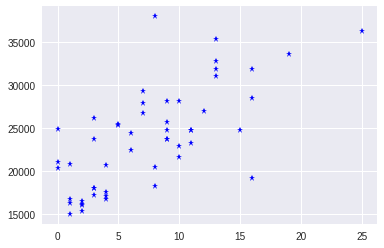

In [12]:
# ploteamos la imagen
plt.plot(years_in_job, yearly_salary, '*b')
plt.show()

¿Consideras adecuado el tamaño de la imagen? ¿Y el tipo o el color del marcador?

In [13]:
# veamos opciones de imagen
plt.figure?

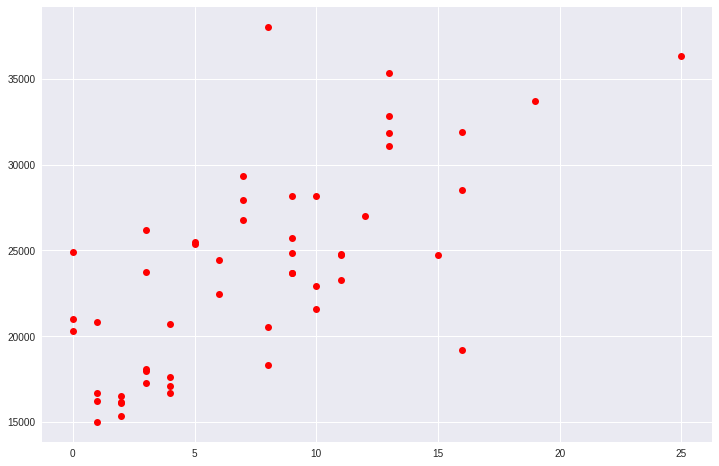

In [14]:
# agrandemos la imagen y modificamos los marcadores
plt.figure(figsize=(12,8))
plt.plot(years_in_job, yearly_salary, 'or')
plt.show()

In [15]:
# indaguemos sobre opciones de leyendas y etiquetas
plt.xlabel?
#plt.title?

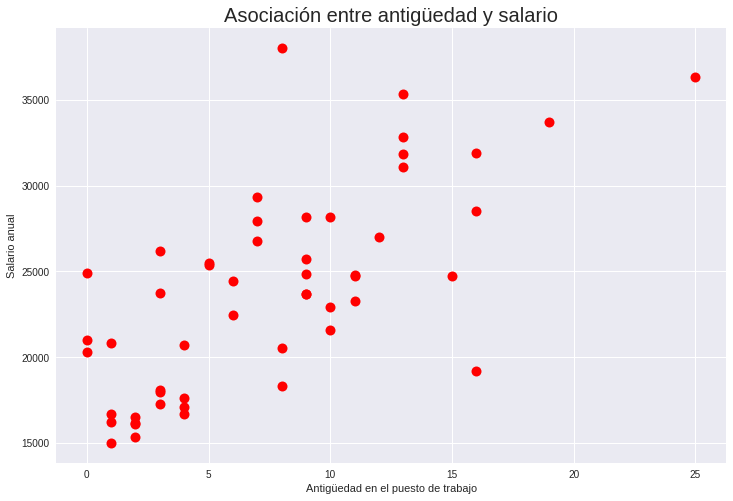

In [16]:
# incluyamos nombres de los ejes y título al gráfico
plt.figure(figsize = (12, 8))

# aumentamos el tamaño de los puntos
plt.plot(years_in_job, yearly_salary, 'or', markersize=10)

# nombre eje x
plt.xlabel("Antigüedad en el puesto de trabajo")

# nombre eje y
plt.ylabel("Salario anual")

# título del gráfico
plt.title("Asociación entre antigüedad y salario", fontsize=20)
plt.show()

#### sns.jointplot()

In [1]:
# veamos de qué se trata el jointplot de seaborn
sns.jointplot?

Object `sns.jointplot` not found.


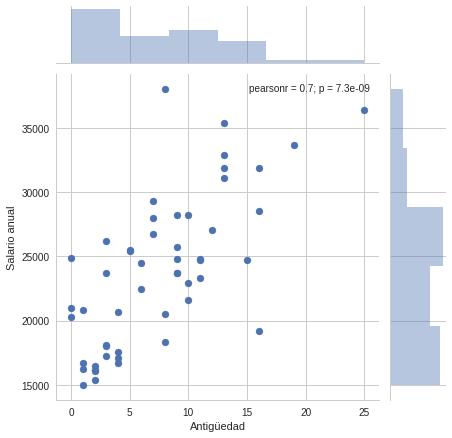

In [18]:
# ploteamos nuestras dos variables de interés con sus respectivos histogramas
sns.set_style('whitegrid')
ax = sns.jointplot(years_in_job,yearly_salary)
ax.set_axis_labels(xlabel='Antigüedad', ylabel='Salario anual')

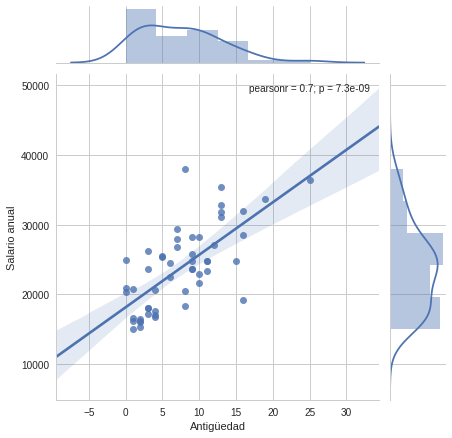

In [19]:
# es posible incluir una regresión lineal entre ambas variables y su distribución conjunta activando KIND='REG'
ax = sns.jointplot(years_in_job, yearly_salary, kind='reg')
ax.set_axis_labels(xlabel='Antigüedad', ylabel='Salario anual')

Aquí hemos trabajado con todos los datos de forma conjunta... pero esto no sería de gran ayuda si, por ejemplo, necesitáramos analizar las diferencias salariales por género o puesto de trabajo.

#### sns.pairplot()

#### Pair plots de *todo* el dataset

In [21]:
# veamos de qué se trata el pairplot de seaborn
sns.pairplot?

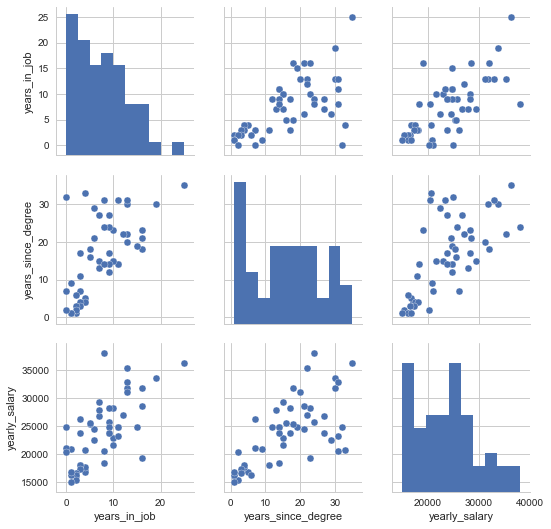

In [22]:
# usemos un paneo global de las variables
sns.pairplot(salary)

Hemos perdido nuestras variables de interés... de las 6 columnas existentes en 'salary', sólo fue posible graficar 3, ¿por qué? ¿qué tipo de dato contienen estas variables? ¿y las omitidas?

### Retomemos nuestro análisis... 

### Ploteo desagregado por categorías

In [23]:
# definamos un subset de nuestro dataset
subset = salary[['gender','professor_rank','years_in_job','yearly_salary']] # pido columnas dentro del corchete
subset.head()

,gender,professor_rank,years_in_job,yearly_salary
0,male,full,25,36350
1,male,full,13,35350
2,male,full,10,28200
3,female,full,7,26775
4,male,full,19,33696


#### Box plots

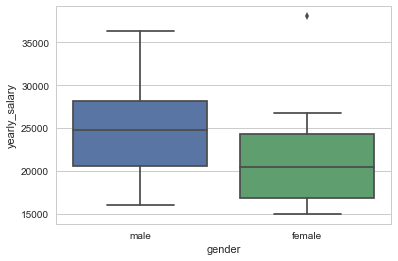

In [24]:
# analicemos la distribución de 'gender' con un boxplot
sns.boxplot(x='gender', y='yearly_salary', data=salary)

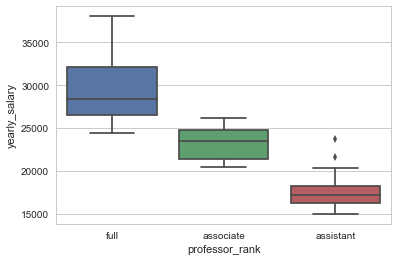

In [25]:
# analicemos la distribución de 'professor_rank' con un boxplot
sns.boxplot(x='professor_rank', y='yearly_salary', data=salary)

A primera visata, será ncesario profundizar nuestro entendimiento sobre las diferencias salariales entre las categorías de 'gender' y 'professor_rank'. Para ello, nos sería de suma utilidad discriminar categorías por forma o color para plotearlas conjuntamente y, a la vez, identificar subgrupos.

Veamos cuán factible es combinar ambas variables categóricas...

#### Gráfico de barras

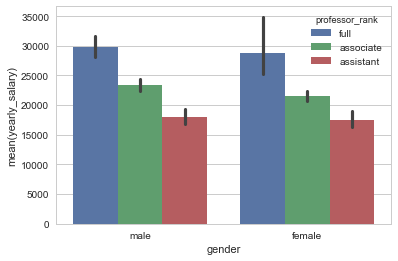

In [26]:
# complementariamente, esta información se puede presentar en un gráfico de barras
sns.barplot(x="gender", y="yearly_salary", hue="professor_rank", data=salary)

* ¿La media per se refleja la heterogeneidad de cada subgrupo?

Para acceder a los valores de la columna podemos usar distintas opciones:

* ```salary.gender.values```

* ```salary[['gender']].values```

In [27]:
# construimos variables que nos permitan realizar la desagregación deseada
gender = salary.gender.values
rank = salary.professor_rank.values

# identificamos las categorías de cada variable, llamando una única vez a cada categoría
gender_values = np.unique(gender)
rank_values = np.unique(rank)

print("Valores de Gender: ", gender_values)
print("Valores de Rank: ", rank_values)

Valores de Gender:  ['female' 'male']
Valores de Rank:  ['assistant' 'associate' 'full']


* ¿Que se observa respecto de la cantidad de observaciones desagregada por categoría? ¿Y respecto de la brecha de ingresos?

#### sns.FacetGrid()

In [28]:
# veamos de qué se trata el FacetGrid de seaborn
sns.FacetGrid?

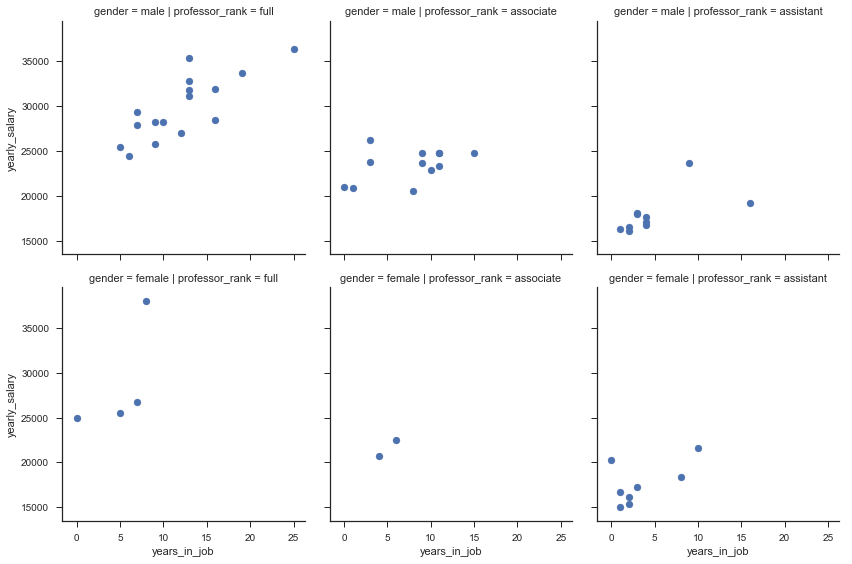

In [31]:
# con FACETGRID podemos plotear todas las combinaciones posibles a partir de las categorías de nuestras variables
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(subset, col="professor_rank", row="gender",size=4)
g = g.map(plt.scatter, "years_in_job", "yearly_salary")

#### Scatter plot combinado

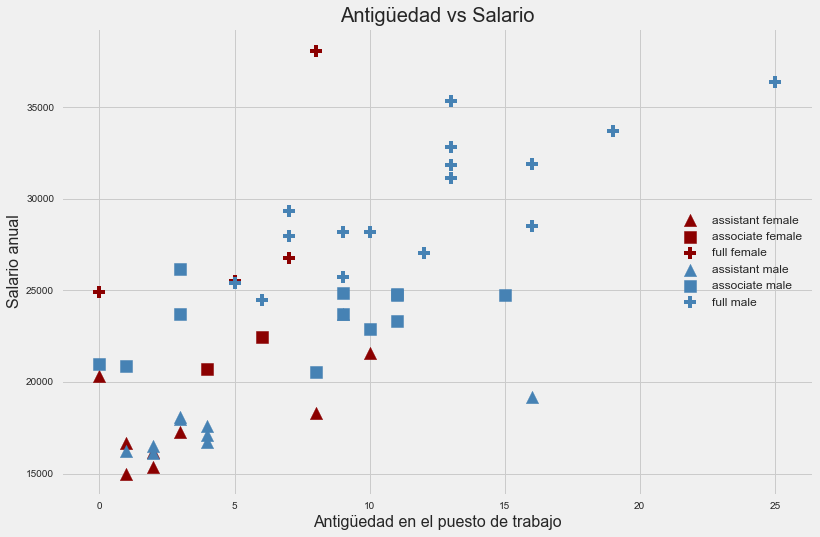

In [32]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
axes = fig.gca()

# a partir de las nuevas variables, generamos un loop
for g in gender_values:
    if g == 'female':
        color = 'darkred'
    elif g == 'male':
        color = 'steelblue'
        
    for r in rank_values:        
        if r == 'full':
            # Representa el punto como un '+'
            point_marker = '+'
        elif r == 'associate':
            # Representa el punto como un cuadrado ('s' de square en inglés)
            point_marker = 's'
        elif r == 'assistant':
            # Representa el punto como un triangulo con punta hacia arriba
            point_marker = '^'
            
        current_years = [y for y, g_, r_ in zip(years_in_job, gender, rank) if g_ == g and r_ == r]
        current_salaries = [s for s, g_, r_ in zip(yearly_salary, gender, rank) if g_ == g and r_ == r]

        axes.scatter(current_years, current_salaries, c=color, marker=point_marker, s=150,
                     label=' '.join([r, g]))

axes.set_title('Antigüedad vs Salario', fontsize=20)
axes.set_xlabel('Antigüedad en el puesto de trabajo', fontsize=16)
axes.set_ylabel('Salario anual', fontsize=16)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = {l:h for l, h in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), loc = 'center right', fontsize=12)